# Giới thiệu

### Mục tiêu bài tập

* Hiểu thêm về cách hoạt động của Numpy và Tensorflow 
* Có thể viết một thuật toán đơn giản (và debug) với `Tensorflow` và `Numpy` qua ví dụ về hồi quy tuyến tính.
* Hiểu thêm về hồi quy tuyến tính.
* Tối ưu các tham số của mô hình.

# Giới thiệu bài toán và dữ liệu

Bài toán lần này, chúng ta sẽ cùng nhau dự đoán giá nhà tại một thành phố Boston ở Mỹ với kích thước mẫu với 506 giá trị với 13 thuộc tính như sau

```
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)ˆ2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
```

Với thông tin này, ta sẽ cùng nhau tiến hành xây dựng một hàm giả thuyết theo mô hình hồi quy tuyến tính dựa trên `numpy` và `tensorflow` để đưa ra giá nhà dựa trên tối đa 10 thuộc tính.
# Chấm điểm
Bài tập này chiếm 50% số điểm cuối kì của mỗi bạn. Điểm được chấm dựa trên các yếu tố sau:

### Báo cáo đầy đủ rõ ràng các công việc đã làm, chứng minh được công việc đã làm thỏa các yêu cầu của đề bài (2 điểm)

### Chương trình chạy được huấn luyện được mô hình, tính toán được Jtest, Jtrain
+ load dữ liệu (1 điểm)
+ trình bày dữ liệu trước khi huấn luyện (1 điểm)
+ xây dựng được mô hình (1 điểm)
+ tính được độ chính xác của mô hình với tập huấn luyện, tập cross validation, tập test (1 điểm)

### Tối ưu hóa được các tham số của mô hình (4 điểm)
+ tối ưu được các tham số cho mô hình và giải thích. Được chọn tối đa 10 thuộc tính trong số các thuộc tính được cung cấp.

Ghi chú: khi vấn đáp mỗi thành viên sẽ được hỏi một câu bất kì liên quan đến các phần trên

### I/ Tìm nghiệm bài toán Linear Regression bằng `Numpy`

#### Nhập thư viện

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics

In [88]:
# from google.colab import drive
# drive.mount('/content/drive')

#### Đọc dữ liệu

In [89]:
# data=pd.read_csv('/content/drive/My Drive/Getting Know ML/housing.csv', delim_whitespace=' ', header=None)
data=pd.read_csv(r'C:\Users\Thanh Long\Desktop\AI\data\housing.csv', delim_whitespace=' ', header=None)
data.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
data.index = np.arange(1, len(data)+1)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# Chọn 5 features là indus, rm, age,dí, ptratio

In [90]:
features=['indus','rm','age','dis','ptratio']

In [91]:
X=data[features]
y=data['medv']

In [92]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=0)

In [93]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# train_X = sc_X.fit_transform(train_X)
# test_X = sc_X.transform(test_X)

In [94]:
train_X=train_X.values
train_y=train_y.values
test_X=test_X.values
test_y=test_y.values


#### Minh họa dữ liệu

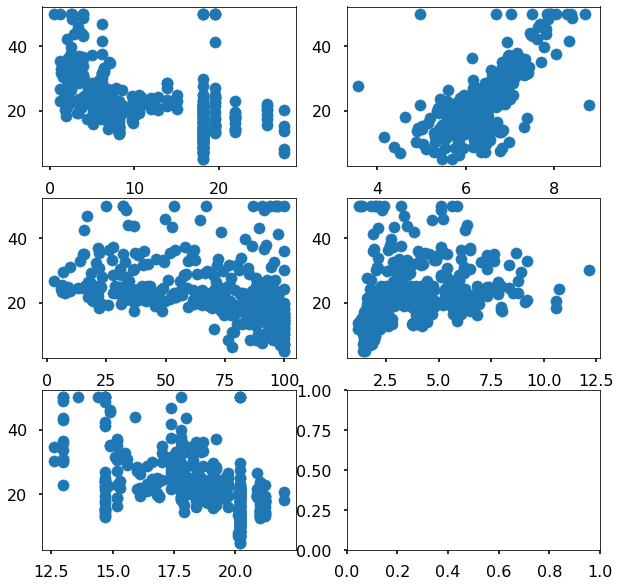

In [95]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(10,10));
ax[0,0].scatter(train_X[:,0],train_y);
ax[0,1].scatter(train_X[:,1],train_y);
ax[1,0].scatter(train_X[:,2],train_y);
ax[1,1].scatter(train_X[:,3],train_y);
ax[2,0].scatter(train_X[:,4],train_y);


Hiên thời, vecto của ta đang có dạng như sau:

In [96]:
print("Size of data X train matrix %s"  % str(train_X.shape))
print("Size of data Y train array %s"  % str(train_y.shape))
print("Size of data X test matrix %s"  % str(test_X.shape))
print("Size of data Y test array %s"  % str(test_y.shape))

Size of data X train matrix (404, 5)
Size of data Y train array (404,)
Size of data X test matrix (102, 5)
Size of data Y test array (102,)


In [97]:
!pip install scikit-learn

#### Bài 1. Viết hàm cost function
$$J(w) = \frac{1}{m} \sum_{i=1}^m loss(\hat{y}^{(i)}, y^{(i)})= \frac{1}{2m} \sum_{i=1}^m (\hat{y}^{(i)}-y^{(i)})^2 $$
Khai triển, ta có kết quả:
$$J(w) = \frac{1}{2m} \sum_{i=1}^m (w_1 x_1^{(i)} + w_2 x_2^{(i)} + b - y^{(i)})^2 $$

#### 1.1. Viết chương trình

In [98]:
def np_cost(w, b, X, y):
    '''
    Evaluate the cost function in a non-vectorized manner for 
    inputs `X` and targets `y`, at weights `w` and `b`.
    
    X: 2D array dataset that has (m, n) dimension. 
    y: list of targets that has (n, ) dimension.
    w: list of weights that has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    cost = 0
    m = X.shape[0]
    for i in range(m):
        
        # TODO: complete below expression to calculate cost function
        y_hat = w[0]*X[i, 0] + w[1]*X[i, 1] + w[2]*X[i, 2] + w[3]*X[i, 3] + w[4]*X[i, 4] +  b # hypothesis
        cost += (y_hat - y[i])**2 # sum cost of each data point.
        
    return cost/(2*m)

#### 1.2 Chạy thử chương trình 

In [99]:
np_cost([1,2,3,4,5], 20, train_X, train_y) 

60404.43114511859

In [100]:
np_cost([1,2,3,4,5], 0, train_X, train_y) 

53892.63746195028

#### Bài 2. Vector hóa hàm cost

Ngoài ra, ta còn có thể viết lại công thức trên như sau:

$$J(w) = \frac{1}{2m} \| X w + b  - y \| ^2$$ 

#### 2.1 Viết chương trình

In [101]:
def np_cost_vectorized(w, b, X, y):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w` and `b`.
    
    X: dataset matrix has (m, n) dimension. 
    y: targets vector has (n, ) dimension.
    w: weights vector has (n, ) dimension
    b: a scalar bias.
    
    Return a scalar cost value of `w`, `b`.
    '''
    
    #TODO: Complete the following expression
    m = X.shape[0] # number of samples in dataset
    w = np.array(w) # convert to numpy array
    y_hat = np.dot(X, w) + b# hypothesis
    
    return np.sum((y_hat - y)**2)/(2*m)

#### 2.2 Chạy thử chương trình

In [102]:
np_cost_vectorized([1,2,3,4,5], 20, train_X, train_y) # 2256.1627893564355

60404.43114511862

In [103]:
np_cost_vectorized([1,2,3,4,5], 0, train_X, train_y) # 1210.8142745049508

53892.637461950304

#### Bài 4.Tính vector gradient của w

Với $i = 1...m $ và $j = 1...n$ xét

$$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m x_j^{(i)}(\hat{y}^{(i)}-y^{(i)}) $$



#### 4.1 Viết chương trình với vòng `for`

In [104]:
def np_grad_fn(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    grad_w = np.zeros(np.array(w).shape)
    m = X.shape[0]
    y_hat = np.dot(X, w)
    for j in range(grad_w.shape[0]):
        for i in range(m):
            grad_w[j] += (y_hat[i] - y[i])*X[i, j]/m
    return grad_w

# Định nghĩa ma trận X_new
 - Là ma trận có nhiều hơn ma trận X một cột có giá trị bằng 1 để làm đối số với bias

In [105]:
train_X_new=np.zeros([train_X.shape[0],train_X.shape[1]+1])
train_X_new[:,-1]=1
train_X_new[:,:-1]=train_X

test_X_new=np.zeros([test_X.shape[0],test_X.shape[1]+1])
test_X_new[:,-1]=1
test_X_new[:,:-1]=test_X

In [106]:
w = [0,0,0,0,0,0]
np_grad_fn(w, train_X_new, train_y)

array([ -217.68376238,  -147.00929827, -1453.76752475,   -90.64052676,
        -406.06965347,   -22.61188119])

#### 4.2 Viết chương trình theo dạng vectorized
$$\nabla J(w) = \frac{1}{m} X^T \left( Xw - y \right)$$ 

In [107]:
def np_grad_fn_vectorized(w, X, y):
    '''
    Given `w` - a current "Guess" of what our weights should be
          `X` - matrix of shape (m, n + 1) of input features
          `y` - target y values
    Return gradient of each weight evaluated at the current value
    '''
    
    #TODO: Complete the below followed the above expressions
    m, n = X.shape
    y_hat = np.dot(X, w)
    grad_w = np.dot(X.T, y_hat - y)/m
    
    return grad_w

In [108]:
w = [0,0,0,0,0,0]
np_grad_fn_vectorized(w, train_X_new, train_y) #[-183.46936646, -130.26687224,  -19.93917772]

array([ -217.68376238,  -147.00929827, -1453.76752475,   -90.64052676,
        -406.06965347,   -22.61188119])

#### Bài  5. Tính dựa trên Gradient Descent

Xấp xỉ giá trị $w$ như sau

$$ w_j = w_j - \alpha * \frac{\partial J}{\partial w_j}$$

#### 5.1 Viết chương trình

In [109]:
def np_solve_via_gradient_descent(X, y, print_every=5000,
                                  niter=100000, alpha=0.005):
    '''
    Given `X` - matrix of shape (m, n+1) of input features
          `y` - target y values
    Solves for linear regression weights.
    Return weights after `niter` iterations.
    '''
    m, n = X.shape
    # initialize all the weights to zeros
    w = np.zeros((n,))
    for k in range(niter):
        
        #TODO: Complete the below followed the above expressions
        dw = np_grad_fn_vectorized(w, X, y) 
        w = w - alpha*dw
        
        if k % print_every == 0:
            print('Weight after %d iteration: %s' % (k, str(w)))
    return w

#### 5.2 Chạy thử chương trình

In [110]:
opt_w = np_solve_via_gradient_descent(train_X_new, train_y, niter=300000,alpha=0.0003)

Weight after 0 iteration: [0.06530513 0.04410279 0.43613026 0.02719216 0.1218209  0.00678356]
Weight after 5000 iteration: [-0.27226975  5.92591629 -0.0285906   0.03149137 -0.56916609  0.5090653 ]
Weight after 10000 iteration: [-0.23541685  7.20156118 -0.0533114  -0.42215954 -0.84553457  0.66002292]
Weight after 15000 iteration: [-0.2307137   7.51585347 -0.06036821 -0.56128181 -0.90452153  0.74711453]
Weight after 20000 iteration: [-0.22998654  7.59187545 -0.06227338 -0.59940832 -0.91958918  0.81839067]
Weight after 25000 iteration: [-0.22996296  7.60754316 -0.06281428 -0.61019129 -0.92428111  0.88543926]
Weight after 30000 iteration: [-0.23009563  7.60783691 -0.06300266 -0.61386646 -0.92637871  0.95117304]
Weight after 35000 iteration: [-0.23026588  7.60422051 -0.06310039 -0.61571148 -0.9278132   1.01633416]
Weight after 40000 iteration: [-0.23044496  7.59962248 -0.06317468 -0.61708351 -0.92907408  1.0811133 ]
Weight after 45000 iteration: [-0.23062562  7.59479134 -0.06324275 -0.61833

In [111]:
print("Training cost:", np_cost_vectorized(opt_w[:5], opt_w[-1], train_X, train_y)) # 18.502043170574055

Training cost: 14.867328054721167


In [112]:
print("Testing cost:", np_cost_vectorized(opt_w[:5], opt_w[-1], test_X, test_y)) # 24.051240417619557

Testing cost: 23.19417009426707


# Tính y predict

In [113]:
predict_y=test_X_new@opt_w

In [114]:
pd.DataFrame({'y':test_y,'predict_y':predict_y})

,y,predict_y
0,22.6,28.689136
1,50.0,18.268372
2,23.0,23.198695
3,8.3,11.781622
4,21.2,21.600700
...,...,...
97,24.7,25.363710
98,14.1,20.588615
99,18.7,16.519846
100,28.1,25.424303


# Plot y_test, y_predict

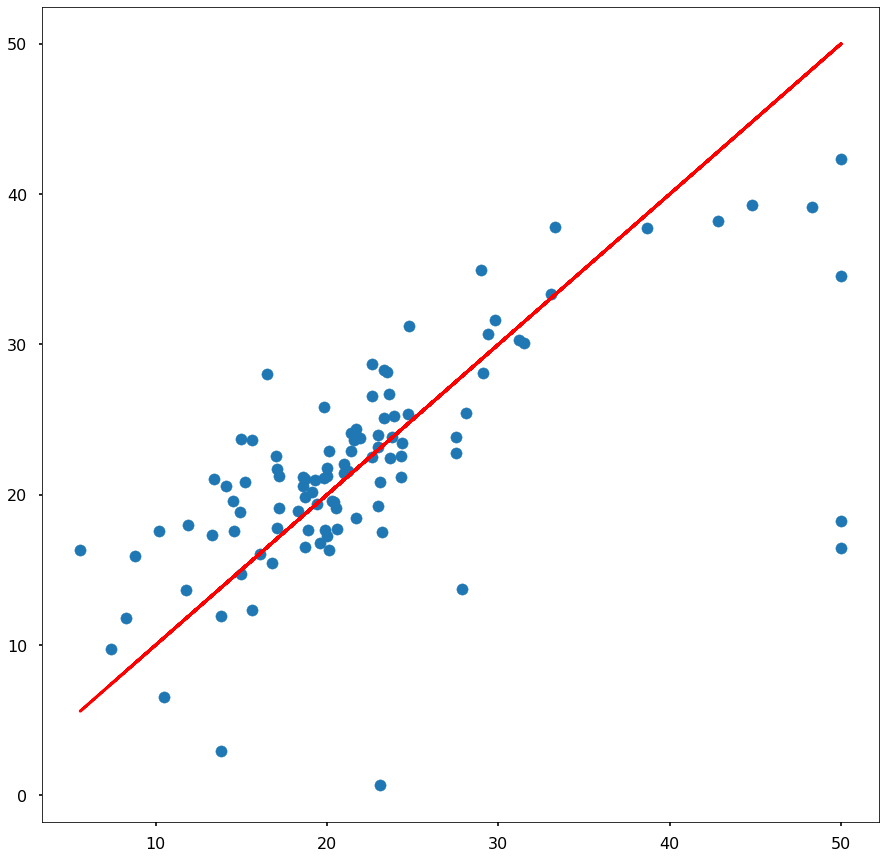

In [115]:
plt.subplots(figsize=[15,15])
plt.scatter(test_y,predict_y)
plt.plot(test_y,test_y,'r')

### II. Thực hiện bằng `Tensorflow`

#### Load dataset

In [116]:
data=pd.read_csv(r'C:\Users\Thanh Long\Desktop\AI\data\housing.csv', delim_whitespace=' ', header=None)
data.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
data.index = np.arange(1, len(data)+1)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [117]:
X = data.drop('medv', axis = 1)
y = data['medv']

#### Chia bộ dữ liệu thành train_test

In [143]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.7,random_state=0)

In [144]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train_X = sc_X.fit_transform(train_X)
test_X = sc_X.transform(test_X)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

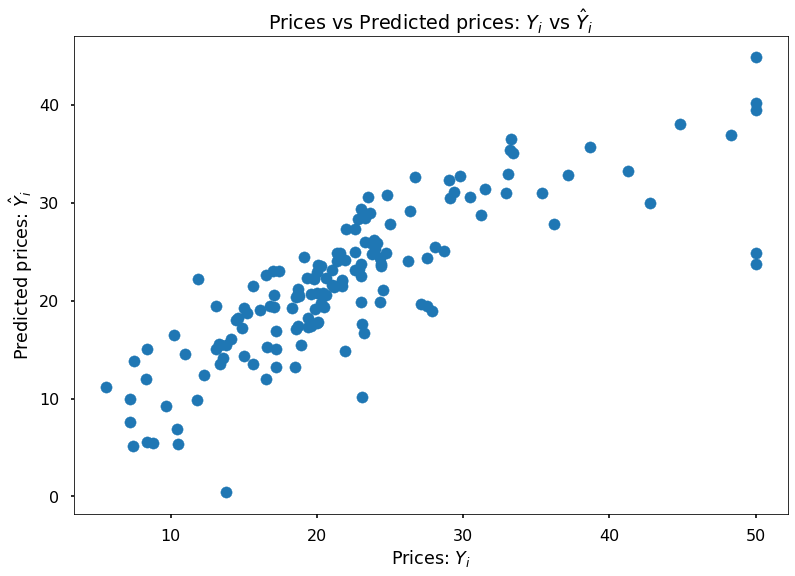

In [145]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y)

y_pred = lr.predict(test_X)
plt.style.use('seaborn-poster')
plt.scatter(test_y,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#### Sai số trung bình của mô hình

In [146]:
mse = sklearn.metrics.mean_squared_error(test_y, y_pred)
mse

27.195965766883198

In [147]:
sklearn.metrics.r2_score(test_y,y_pred)

0.6733825506400196

In [148]:
lr.score(test_X,test_y)

0.6733825506400196

In [149]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=10)
ridge.fit(train_X,train_y)
ridge.score(train_X,train_y)

0.7633167147255946

In [150]:
ridge.score(train_X,train_y)


0.7633167147255946